In [1]:
## import libraries 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Imputer
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import calendar
from numpy import percentile

%matplotlib inline

In [216]:
## read data
data_review = pd.read_csv('C:/reviews.csv')
data_listing = pd.read_csv('C:/listings.csv')
data_calendar = pd.read_csv('C:/calendar.csv')

In [3]:
# a function that formats variables like price,rates, dates
def cleaned_data(data):
    
    # Convert string of prices to floats
    
    data['price_y'] = data['price_y'].astype(str).str.replace('$','')
    data['price_y'] = data['price_y'].astype(str).str.replace(',','')
    data['price_y'] = data['price_y'].astype(float)
    
    data['weekly_price'] = data['weekly_price'].astype(str).str.replace('$','')
    data['weekly_price'] = data['weekly_price'].astype(str).str.replace(',','')
    data['weekly_price'] = data['weekly_price'].astype(float)
    
    data['monthly_price'] = data['monthly_price'].astype(str).str.replace('$','')
    data['monthly_price'] = data['monthly_price'].astype(str).str.replace(',','')
    data['monthly_price'] = data['monthly_price'].astype(float)
    
    data['extra_people'] = data['extra_people'].astype(str).str.replace('$','')
    data['extra_people'] = data['extra_people'].astype(str).str.replace(',','')
    data['extra_people'] = data['extra_people'].astype(str).astype(float)
    
    data['cleaning_fee'] = data['cleaning_fee'].astype(str).str.replace('$','')
    data['cleaning_fee'] = data['cleaning_fee'].astype(str).str.replace(',','')
    data['cleaning_fee'] = data['cleaning_fee'].astype(str).astype(float)
    
    data['security_deposit'] = data['security_deposit'].astype(str).str.replace('$','')
    data['security_deposit'] = data['security_deposit'].astype(str).str.replace(',','')
    data['security_deposit'] = data['security_deposit'].astype(float)
    
    
    data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(str).str.replace('%','')
    data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)
    
    data['host_response_rate'] = data['host_response_rate'].astype(str).str.replace('%','')
    data['host_response_rate'] = data['host_response_rate'].astype(float)
    
    data['date'] = pd.to_datetime(data['date'])
    data['host_since'] = pd.to_datetime(data['host_since'])

    data['month']=data.date.dt.month
    data['year']=data.host_since.dt.year

  
    return data

In [4]:
# merge listing and calendar data set to find correlation between price and other features
data_listing = data_listing.rename(columns={'id' : 'listing_id'})
data_new = data_listing.merge(data_calendar , on ='listing_id')
data_listing_calendar_cleaned = cleaned_data(data_new)


In [301]:
Data_Price.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y,month,year
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,2016-01-04,t,85.0,1,2011.0
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,2016-01-05,t,85.0,1,2011.0
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,2016-01-06,f,NaN,1,2011.0
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,2016-01-07,f,NaN,1,2011.0
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,2016-01-08,f,NaN,1,2011.0


In [304]:
### how many unique lisitings exist in the listing and Data_Price 
display(data_listing['id'].nunique())
display(Data_Price['listing_id'].nunique())

3818

3818

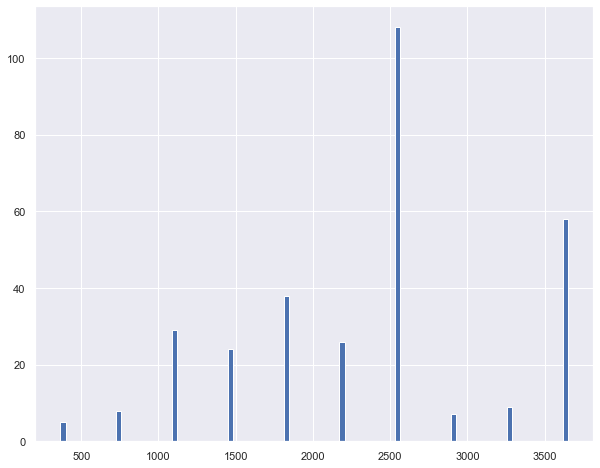

In [308]:
## lets see how maximum nigths distributed, if there is any pattern 
# sum of maximun nights 
Max_Per_Listing = Data_Price.groupby(['listing_id']).agg({'maximum_nights':'sum'})
Max_Per_Listing.rename(index=str, columns={"listing_id": "maximum_nights"},inplace=True)
# show me the number of listings that have less than 4000 maximum nights in total
Max_Per_Listing[Max_Per_Listing['maximum_nights'] < 4000].maximum_nights.hist(figsize=(10,8),bins=100);

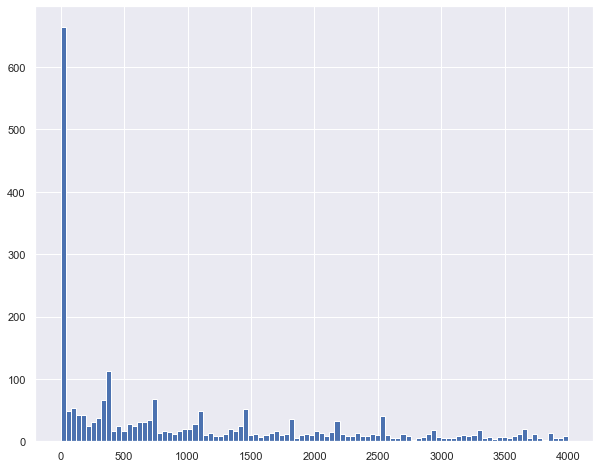

In [449]:
## lets see if there is any pattern in number of reviews 
Review_Per_Listing = Data_Price.groupby(['listing_id']).agg({'number_of_reviews':'sum'})
Review_Per_Listing.rename(index=str, columns={"listing_id": "number_of_reviews"},inplace=True)
Review_Per_Listing[Review_Per_Listing['number_of_reviews'] < 4000].number_of_reviews.hist(figsize=(10,8),bins=100);

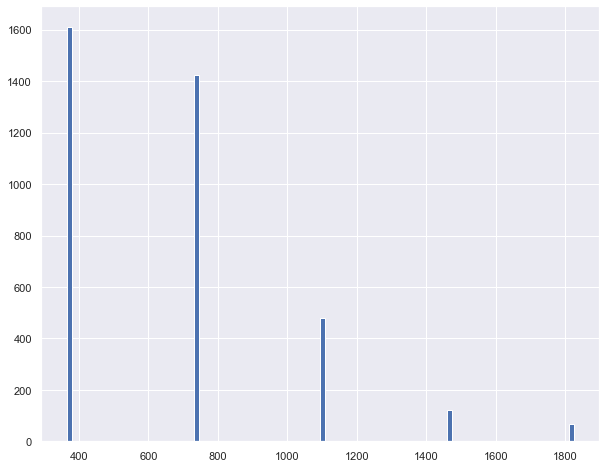

In [310]:
## lets see how minimum nigths distributed 
# So there is a pattern in minimum nigths over years 
# it would be more reasonable to analyze price rates values for one year
Minimun_Per_Listing = Data_Price.groupby(['listing_id']).agg({'minimum_nights':'sum'})
Minimun_Per_Listing.rename(index=str, columns={"listing_id": "minimum_nights"},inplace=True)
Minimun_Per_Listing[Minimun_Per_Listing['minimum_nights'] < 2000].minimum_nights.hist(figsize=(10,8),bins=100)


In [314]:
## missing value percentage 
Data_Price.isnull().sum() * 100 / len(Data_Price)

listing_id                            0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               4.635935
space                                14.903091
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                27.029859
notes                                42.063908
transit                              24.463070
thumbnail_url                         8.381351
medium_url                            8.381351
picture_url                           0.000000
xl_picture_url                        8.381351
host_id                               0.000000
host_url                              0.000000
host_name                             0.052383
host_since                            0.052383
host_location                         0.209534
host_about   

In [315]:
## drop the 32% price missing values
Data_Price.dropna(axis=0,subset=['price_y'],inplace=True)

In [316]:
## double check the variables' formats
Data_Price.dtypes

listing_id                                   int64
listing_url                                 object
scrape_id                                    int64
last_scraped                                object
name                                        object
summary                                     object
space                                       object
description                                 object
experiences_offered                         object
neighborhood_overview                       object
notes                                       object
transit                                     object
thumbnail_url                               object
medium_url                                  object
picture_url                                 object
xl_picture_url                              object
host_id                                      int64
host_url                                    object
host_name                                   object
host_since                     

(array([5.22858e+05, 2.93054e+05, 7.30490e+04, 2.47690e+04, 1.15430e+04,
        3.49200e+03, 3.53100e+03, 3.65000e+02, 1.11200e+03, 5.62000e+02,
        7.10000e+01, 1.70000e+01, 0.00000e+00, 2.80000e+01, 9.10000e+01]),
 array([  10.        ,  119.33333333,  228.66666667,  338.        ,
         447.33333333,  556.66666667,  666.        ,  775.33333333,
         884.66666667,  994.        , 1103.33333333, 1212.66666667,
        1322.        , 1431.33333333, 1540.66666667, 1650.        ]),
 <a list of 15 Patch objects>)

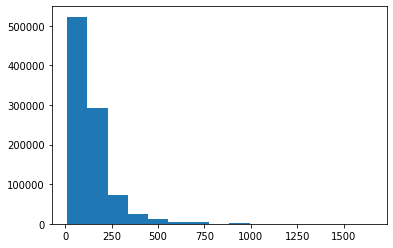

In [7]:
# first step is to visualize how price values are distributed 
plt.hist(Data_Price['price_y'], bins=15)
## price values are skewed to right and on average almost a listing price rate is close to 130$ 


In [8]:
## price rates summary stat
display(percentile(Data_Price['price_y'], [0,25, 50, 75,100]))

array([  10.,   75.,  109.,  160., 1650.])

In [317]:
## convert price to numeric
Data_Price['price_y'] = pd.to_numeric(Data_Price['price_y'])

## Average price per night for the year
Data_Price['price_y'].mean()

137.94485855103355

In [12]:
## first approach: monthly average price 
Data_Price['month'] = Data_Price['month'].apply(lambda x: int(x))
Data_Price['month'] = Data_Price['month'].apply(lambda x: calendar.month_abbr[x])
monthly_price = Data_Price.groupby(['month'])['price_y'].mean()
monthly_price

month
Apr    135.097005
Aug    150.656594
Dec    137.251835
Feb    124.293927
Jan    122.912176
Jul    152.094150
Jun    147.473137
Mar    128.644488
May    139.538183
Nov    135.688738
Oct    137.031939
Sep    143.255949
Name: price_y, dtype: float64

In [13]:
# second approach: monthly average price 
monthly_price = Data_Price.groupby(['month'])['price_y'].mean()
monthly_price = pd.DataFrame(monthly_price).reset_index()
monthly_price

,month,price_y
0,Apr,135.097005
1,Aug,150.656594
2,Dec,137.251835
3,Feb,124.293927
4,Jan,122.912176
5,Jul,152.094150
6,Jun,147.473137
7,Mar,128.644488
8,May,139.538183
9,Nov,135.688738


In [14]:
## sort the month lists for plotting
# list of sorted months
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# map the average calculation for each listed month 
mapping = {month: i for i, month in enumerate(months)}
key = monthly_price['month'].map(mapping)    
monthly_price = monthly_price.iloc[key.argsort()]
monthly_price

,month,price_y
4,Jan,122.912176
3,Feb,124.293927
7,Mar,128.644488
0,Apr,135.097005
8,May,139.538183
6,Jun,147.473137
5,Jul,152.094150
1,Aug,150.656594
11,Sep,143.255949
10,Oct,137.031939


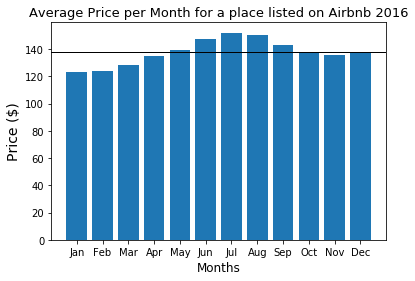

In [21]:
## This bar plot shows the Average Monthly price (plot1)
plt.bar(monthly_price['month'],monthly_price['price_y'])
plt.title("Average Price per Month for a place listed on Airbnb 2016",fontsize=13)
plt.xlabel("Months",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
plt.axhline(y=monthly_price['price_y'].mean() ,linewidth=1, color='k')

In [17]:
## convert the month to str
Data_Price['month'] = Data_Price['month'].astype(str)

In [18]:
## average weekly prices (plot 2)
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekly_price = Data_Price.groupby(Data_Price['date'].dt.strftime('%w'))['price_y'].mean()
weekly_price = pd.DataFrame(weekly_price).reset_index()
weekly_price['date'] = weekly_price['date'].replace(['0','1','2','3','4','5','6'], week_list)
weekly_price

,date,price_y
0,Mon,136.459941
1,Tue,135.676414
2,Wed,135.408764
3,Thu,135.447880
4,Fri,136.476032
5,Sat,143.036294
6,Sun,143.202136


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


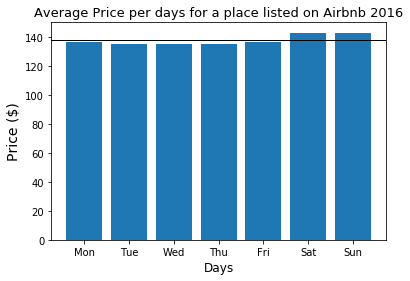

In [120]:
## on average during the weekend prices are a little more
plt.bar(weekly_price['date'],weekly_price['price_y'])
plt.title("Average Price per days for a place listed on Airbnb 2016",fontsize=13)
plt.xlabel("Days",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
plt.axhline(y=weekly_price['price_y'].mean() ,linewidth=1, color='k')

Text(0.5, 1.0, 'price vs number of listings for different properties')

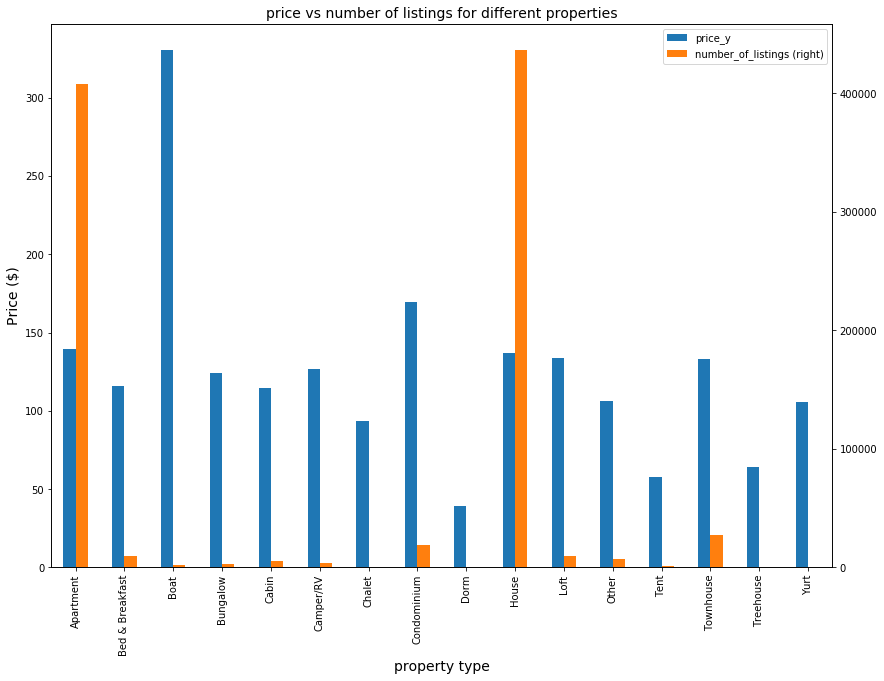

In [24]:
## howmuch each property cost vs how many times those properties listed over 2016 (plot 3)
price_vs_property = Data_Price.groupby(['property_type']).agg({'price_y':'mean','listing_id':'count'})
price_vs_property.rename(index=str, columns={"listing_id": "number_of_listings"},inplace=True)

fig, ax = plt.subplots(figsize=(14,10))
price_vs_property.plot.bar(y=['price_y','number_of_listings'], secondary_y='number_of_listings', ax=ax)
ax.set_xlabel("property type",fontsize=14)
ax.set_ylabel("Price ($)",fontsize=14)
ax.set_title("price vs number of listings for different properties", fontsize =14)

Text(0.5, 1.0, 'price vs number of listings for different rooms')

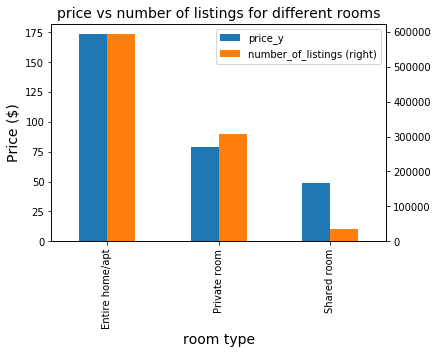

In [25]:
## howmuch different rooms cost vs how many times those rooms were listed over 2016 (plot 4)
price_vs_room = Data_Price.groupby(['room_type']).agg({'price_y':'mean','listing_id':'count'})
price_vs_room.rename(index=str, columns={"listing_id": "number_of_listings"},inplace=True)

fig, ax = plt.subplots(figsize=(6,4))
price_vs_room.plot.bar(y=['price_y','number_of_listings'], secondary_y='number_of_listings', ax=ax)
ax.set_xlabel("room type",fontsize=14)
ax.set_ylabel("Price ($)",fontsize=14)
ax.set_title("price vs number of listings for different rooms", fontsize =14)

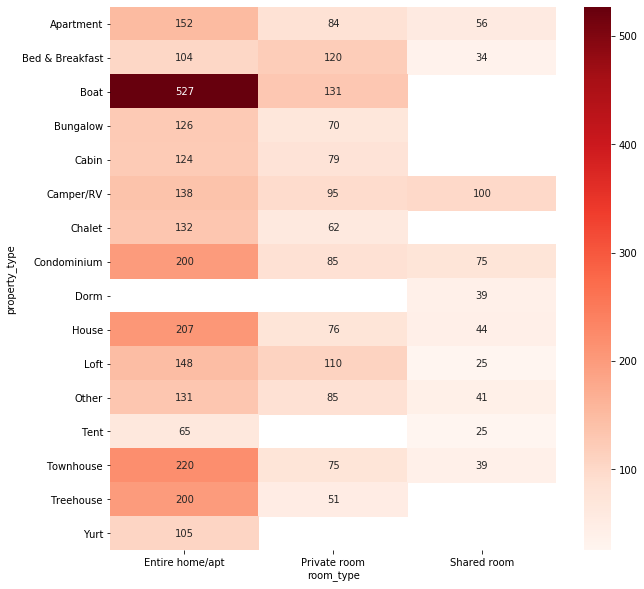

In [121]:
## average prices for different rooms and properties (plot 5)
fig, ax = plt.subplots(figsize=(10,10))
sea_heat = sns.heatmap(Data_Price.groupby(['property_type','room_type']).price_y.mean().unstack(),cmap="Reds",annot=True, fmt=".0f",ax=ax);
fig = sea_heat.get_figure()


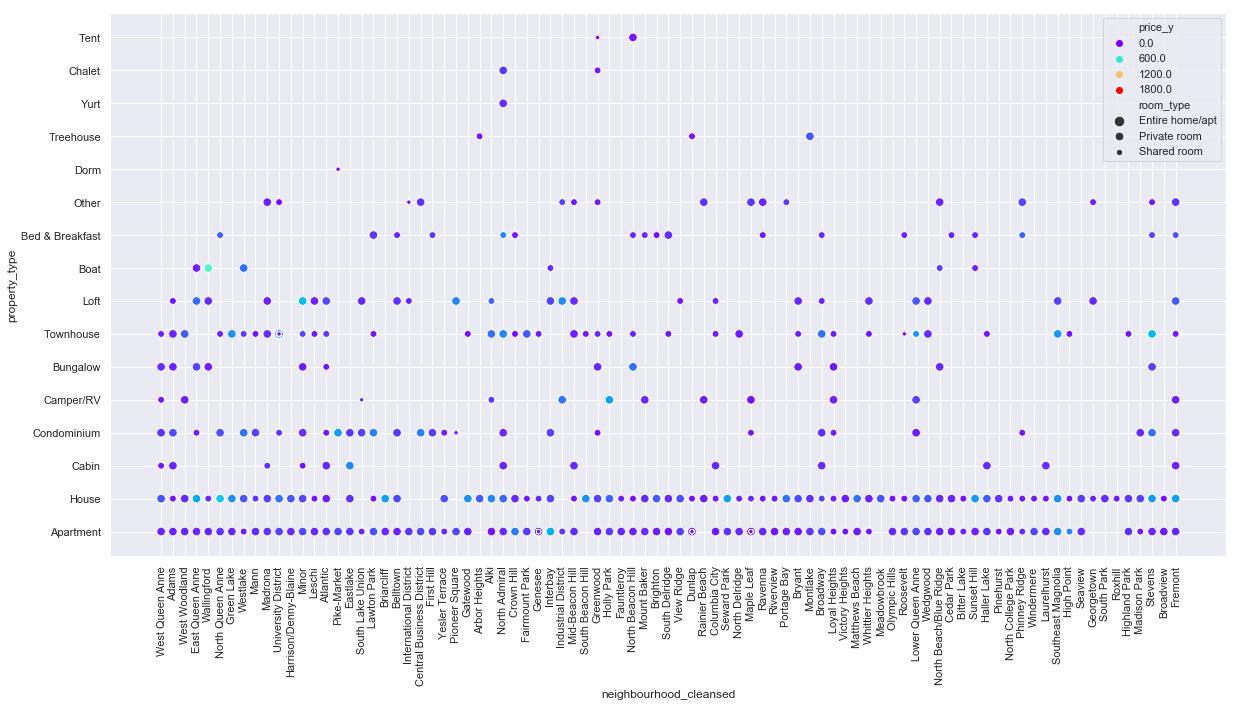

In [449]:
### scatter plot that shows how prices are changing based on property and room type (plot 6)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='neighbourhood_cleansed',hue='price_y',size='room_type',y='property_type',palette='rainbow',data=Data_Price)

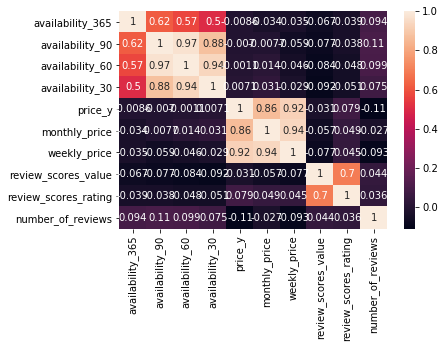

In [122]:
## correlation plot between numeric variables 
## high correlation exist between some features like 30, 60 and 90 avaialbility AND weekly and monthly price AND review score and review rating
sns.heatmap(
    Data_Price[['availability_365','availability_90','availability_60','availability_30','price_y','monthly_price',
            'weekly_price','review_scores_value','review_scores_rating','number_of_reviews']].corr(),annot=True)

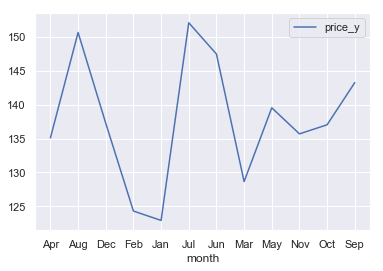

In [397]:
## line chart that shows how price rate are changing monthly 
# during summer prices goes up 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Data_Price['month'] = pd.Categorical(Data_Price['month'], categories=months, ordered=True)
sns.lineplot(data=pd.pivot_table(data=Data_Price[(Data_Price['available'] == "t")],index='month',values='price_y',aggfunc='mean'))

In [344]:
# select important variablesthat migth be highly correlated to price based on visualization I have done so far
Data_Ready_Model_Price = Data_Price[['month','property_type', 'room_type','bathrooms', 'bedrooms','accommodates','beds','year',\
                                     'host_is_superhost','availability_365','availability_30','availability_60','availability_90','number_of_reviews','price_y','bed_type',\
                                      'require_guest_phone_verification','cancellation_policy','require_guest_profile_picture',\
                                      'monthly_price','review_scores_value','review_scores_rating',\
                                      'review_scores_cleanliness','minimum_nights','guests_included','cleaning_fee','host_response_rate','host_response_time','host_acceptance_rate',\
                                     'instant_bookable','host_listings_count', 'host_total_listings_count',\
                                     'neighbourhood_cleansed','extra_people','reviews_per_month','available','review_scores_accuracy','security_deposit']]

In [345]:
# dealing with missing values to prepare data for predictive analysis
Data_Ready_Model_Price.isnull().sum()

month                                    0
property_type                          309
room_type                                0
bathrooms                             4803
bedrooms                              2003
accommodates                             0
beds                                   365
year                                    92
host_is_superhost                       92
availability_365                         0
availability_30                          0
availability_60                          0
availability_90                          0
number_of_reviews                        0
price_y                                  0
bed_type                                 0
require_guest_phone_verification         0
cancellation_policy                      0
require_guest_profile_picture            0
monthly_price                       535652
review_scores_value                 146114
review_scores_rating                144537
review_scores_cleanliness           145929
minimum_nig

In [139]:
## remove the rows having monthly price missing values 
#Data_Ready_Model_Price.dropna(axis=0,subset=['monthly_price'],inplace=True)

C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [346]:
# encode binary variables that dont have missing values
binary_vars = ['require_guest_phone_verification','require_guest_profile_picture','host_is_superhost',\
                'instant_bookable','available']
for var in binary_vars:
    Data_Ready_Model_Price[var] = np.where(Data_Ready_Model_Price[var] == "t" ,1 , 0)
    
# encode categorical variables with more than two levels and keep the missings as a new level to data
# decided to have beds, bathrooms and bedrooms as categorical variable since we have missing values and dont want to loose 
# information but replacing them with zero or removing them 
categorical_vars = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type',\
                      'bed_type', 'cancellation_policy','require_guest_phone_verification','require_guest_profile_picture',\
                      'instant_bookable','month','year']
for var in categorical_vars:
     Data_Ready_Model_Price = pd.concat([Data_Ready_Model_Price.drop(var, axis=1),\
                        pd.get_dummies(Data_Ready_Model_Price[var],\
                                       prefix=var, prefix_sep='_', drop_first=False, dummy_na=True)], axis=1)
        


C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [350]:
# replace othe missing values with the mean 
var_mean = ['bathrooms', 'bedrooms' ,'beds' ,'monthly_price','review_scores_value' ,'review_scores_rating','review_scores_cleanliness','cleaning_fee' ,
'host_response_rate', 'host_acceptance_rate', 'reviews_per_month', 'review_scores_accuracy','host_listings_count','host_total_listings_count','security_deposit']

imputer = Imputer(strategy="mean")
Data_Ready_Model_Price[var_mean] = imputer.fit_transform(Data_Ready_Model_Price[var_mean])



C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [351]:
# double check if there is any missing values before applying algorithm 
Data_Ready_Model_Price.isnull().sum()

bathrooms                                0
bedrooms                                 0
accommodates                             0
beds                                     0
host_is_superhost                        0
availability_365                         0
availability_30                          0
availability_60                          0
availability_90                          0
number_of_reviews                        0
price_y                                  0
monthly_price                            0
review_scores_value                      0
review_scores_rating                     0
review_scores_cleanliness                0
minimum_nights                           0
guests_included                          0
cleaning_fee                             0
host_response_rate                       0
host_acceptance_rate                     0
host_listings_count                      0
host_total_listings_count                0
extra_people                             0
reviews_per

In [352]:
### remove columns that has all zero values like instant bookable_nan
Data_Ready_Model_Price= Data_Ready_Model_Price.loc[:, (Data_Ready_Model_Price != 0).any(axis=0)] 

In [353]:
### scale numeric variables ready for fitting
col_names = ['bathrooms','bedrooms','beds','accommodates','availability_365','availability_30','availability_60',\
             'availability_90','number_of_reviews','price_y','monthly_price','review_scores_cleanliness','minimum_nights',\
             'guests_included','host_response_rate','host_listings_count','host_acceptance_rate','host_total_listings_count',\
             'reviews_per_month', 'extra_people','cleaning_fee','minimum_nights','review_scores_value' ,'review_scores_rating',\
             'review_scores_accuracy','security_deposit']
features = Data_Ready_Model_Price[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [354]:
Data_Ready_Model_Price[col_names] = features

In [355]:
Data_Ready_Model_Price.head()

,bathrooms,bedrooms,accommodates,beds,host_is_superhost,availability_365,availability_30,availability_60,availability_90,number_of_reviews,...,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_nan
0,-0.445308,-0.336404,0.341795,-0.632531,0,0.434956,-0.530038,-0.135872,0.071352,4.596014,...,0,0,0,1,0,0,0,0,0,0
1,-0.445308,-0.336404,0.341795,-0.632531,0,0.434956,-0.530038,-0.135872,0.071352,4.596014,...,0,0,0,1,0,0,0,0,0,0
9,-0.445308,-0.336404,0.341795,-0.632531,0,0.434956,-0.530038,-0.135872,0.071352,4.596014,...,0,0,0,1,0,0,0,0,0,0
10,-0.445308,-0.336404,0.341795,-0.632531,0,0.434956,-0.530038,-0.135872,0.071352,4.596014,...,0,0,0,1,0,0,0,0,0,0
14,-0.445308,-0.336404,0.341795,-0.632531,0,0.434956,-0.530038,-0.135872,0.071352,4.596014,...,0,0,0,1,0,0,0,0,0,0


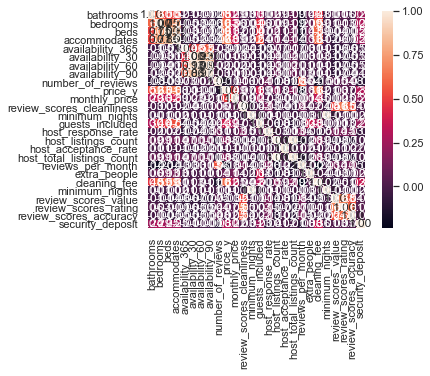

In [357]:
# heatmap of all numeric variables 
corrs = np.corrcoef(Data_Ready_Model_Price[col_names].values.T)
sns.set(font_scale=1)
# plt.figure(figsize=(40, 20))
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = col_names, xticklabels = col_names)


In [395]:
## remove the duplicates 
Data_Ready_Model_Price = Data_Ready_Model_Price.drop_duplicates()


In [397]:
# train-valid-test split
train, valid_test = train_test_split(Data_Ready_Model_Price, test_size=0.2,random_state=1)
valid, test = train_test_split(valid_test, test_size=0.5,random_state=1)

Y_train = train['price_y']
X_train = train.drop(columns=['price_y'])

Y_valid = valid['price_y']
X_valid = valid.drop(columns=['price_y'])

Y_test = test['price_y']
X_test = test.drop(columns=['price_y'])

In [398]:
## benchmark Random Forest 
# Import the Random Forest model to find important variables 
rf = RandomForestRegressor(random_state = 12)
# Train the model on training data
rf.fit(X_train, Y_train)


C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=0,
                      warm_start=False)

In [399]:
## list the important variables
feature_list = list(X_train)
importances = list(rf.feature_importances_)
Var_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
Var_importance = sorted(Var_importance, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in Var_importance];

Variable: cleaning_fee         Importance: 0.24
Variable: bedrooms             Importance: 0.18
Variable: bathrooms            Importance: 0.09
Variable: room_type_Entire home/apt Importance: 0.07
Variable: monthly_price        Importance: 0.06
Variable: accommodates         Importance: 0.05
Variable: host_listings_count  Importance: 0.02
Variable: reviews_per_month    Importance: 0.02
Variable: beds                 Importance: 0.01
Variable: availability_365     Importance: 0.01
Variable: availability_30      Importance: 0.01
Variable: availability_60      Importance: 0.01
Variable: availability_90      Importance: 0.01
Variable: number_of_reviews    Importance: 0.01
Variable: review_scores_rating Importance: 0.01
Variable: guests_included      Importance: 0.01
Variable: host_response_rate   Importance: 0.01
Variable: host_total_listings_count Importance: 0.01
Variable: extra_people         Importance: 0.01
Variable: security_deposit     Importance: 0.01
Variable: cancellation_policy_

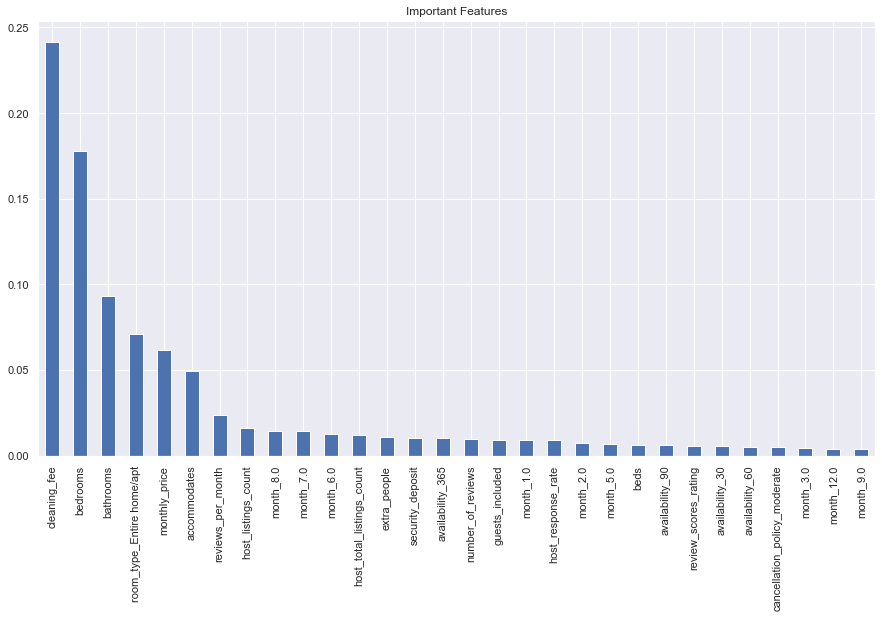

In [407]:
#### important variables as a bar chart for benchmark model
predictors=list(X_train)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False).head(30)
feat_imp.plot(kind='bar', title='Important Features', figsize=(15,8))
# plt.ylabel('Feature Importance Score')

In [400]:
## enhance the benchmark model and find best model by gridsearch 
# this function returns the best hyperparameters that caused highest accuracy.
# change the number of trees, number of features considered in the model
def grid_search_cv_RF (X_train, Y_train):
    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [30,40,50],
            "max_features"      : ["auto", "sqrt"],
            "min_samples_split" : [2,4,8,10],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10)

    grid.fit(X_train, Y_train)

    return grid.best_score_ , grid.best_params_

In [401]:
# return best score and accuracy 
best_score , best_params= grid_search_cv_RF (X_train, Y_train)

In [402]:
# training accuracy 
best_score

0.9079250841444396

In [403]:
# best parameters
best_params

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 40}

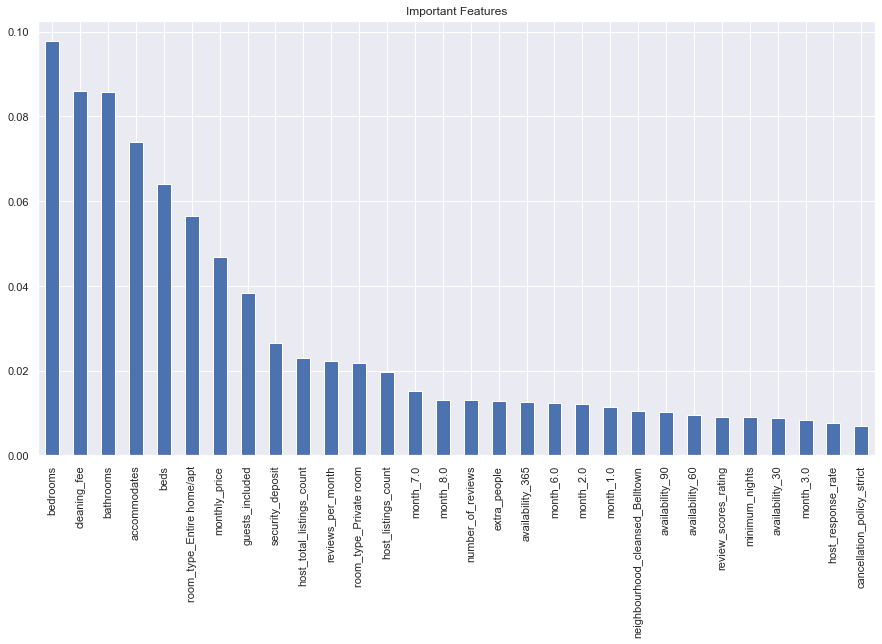

In [408]:
## important variables as a bar chart for best model
# first fit the best model of the train 
best_model = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
best_model.fit(X_train,Y_train)

predictors=list(X_train)
feat_imp = pd.Series(best_model.feature_importances_, predictors).sort_values(ascending=False).head(30)
feat_imp.plot(kind='bar', title='Important Features', figsize=(15,8))
# plt.ylabel('Feature Importance Score')

In [409]:
## R2 for the best model on test data
def Predict_RF (X_train, X_test, Y_train, Y_test, best_params):
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,Y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:", r2_score (Y_test,y_predict), '%.')

    return Y_test,y_predict

In [410]:
## predicted test values and test accuracy 
# 90% accuracy on new dataset, pretty good!
y_test , y_predict = Predict_RF (X_train, X_test, Y_train, Y_test, best_params)

R2 score: 0.9043847419295212 %.


In [220]:
## time series. My focous here is the calendar data 
price_available = data_calendar[data_calendar['available']=='t']
price_available['price_cleaned'] = price_available['price'].str.replace('$','').apply(pd.to_numeric, errors='coerce')
# price_available['date'] = pd.to_datetime(price_available['date'])
price_available.index = price_available['date']
price_available = price_available.drop(columns=['date','available','price'])


C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [223]:
mean_price.head()

,price_cleaned
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853


In [276]:
## time series. My focous here is the calendar data 
# find the daily average price for the listings that are available
price_available = data_calendar[data_calendar['available']=='t']
price_available['price_cleaned'] = price_available['price'].str.replace('$','').apply(pd.to_numeric, errors='coerce')
price_available['date'] = pd.to_datetime(price_available['date'])
price_available.index = price_available['date']
# drop the columns I don't need
price_available = price_available.drop(columns=['date','available','price'])
# average price aggregated through listing ids
mean_price = price_available.groupby(price_available.index).mean().drop(columns='listing_id')

C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\rahil.bagheri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [257]:
mean_price.head()

,price_cleaned
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853


In [237]:
## check if the daily price rates are stationary.
# being stationary is a time series forecasting requiremnt that has to be checked before forecasting 
# being stationray means, the mean and standard deviation of sries has to be constant over time lags
X = mean_price.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
# price series are not stationary since there is a big Stdev differences for two different time splits 

mean1=132.769439, mean2=141.524845
variance1=97.432256, variance2=52.861344


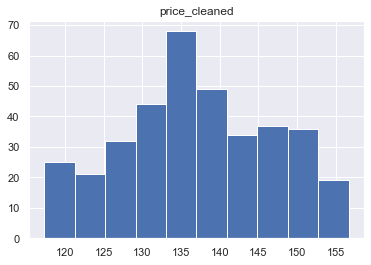

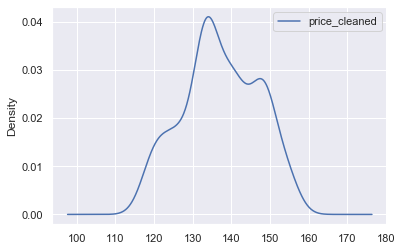

In [239]:
## it looks like average price has Gaussian distribution 
mean_price.hist()
pyplot.show()
mean_price.plot(kind='kde')
pyplot.show()

In [497]:
## to make the series stationary I log transformed the average price
# lets use log transform and check if the series can be stationary or not
X = series.values
X = np.log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('average price:')
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))
# the series look stationary and the daily average price is ready for time series forecasting analysis

average price:
mean1=4.885883, mean2=4.951165
variance1=0.01, variance2=0.00
